  sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch   eye  chest  \
0   m  1.0     85.9    52.4      80.5   35.0      62.0      42.4  14.1   25.5   
1   m  1.0     86.7    52.6      84.0   38.0      62.3      44.8  15.0   23.5   
2   m  1.0     85.8    50.0      81.0   36.5      62.8      43.0  14.8   22.0   
3   m  1.0     86.5    51.0      81.0   36.5      63.0      44.3  13.2   23.0   
4   m  1.0     88.6    54.7      82.5   39.0      64.4      48.0  14.0   25.0   

   belly  
0   30.0  
1   30.5  
2   28.5  
3   28.0  
4   33.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       82 non-null     object 
 1   age       80 non-null     float64
 2   hdlngth   82 non-null     float64
 3   skullw    82 non-null     float64
 4   totlngth  82 non-null     float64
 5   taill     82 non-null     float64
 6   footlgth  81 non-null     f

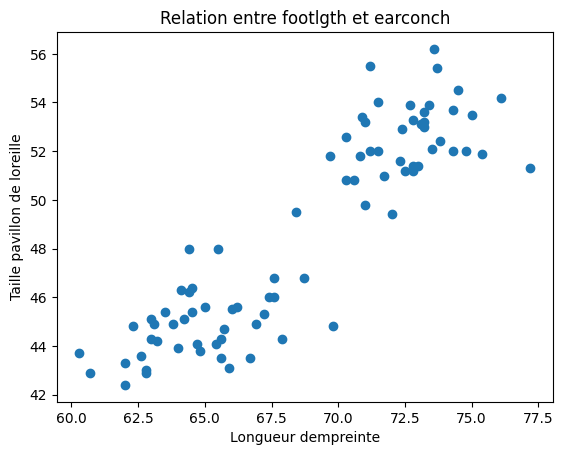

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Tâche 1 :
df = pd.read_csv('possum.csv')

print(df.head())

print(df.info())

df_descriptors = df[['footlgth', 'earconch']]
print(df_descriptors.head())

print(df_descriptors.isnull().sum())

df_clean = df_descriptors.dropna()

print(df_clean.isnull().sum())

print(df_clean.head())
print(df_clean.dtypes)

footlgth = df_clean['footlgth']
earconch = df_clean['earconch']
plt.scatter(footlgth, earconch)
plt.title('Relation entre footlgth et earconch')
plt.xlabel('Longueur d''empreinte')
plt.ylabel('Taille pavillon de l''oreille')
plt.show()

In [ ]:
def predict_model(alpha, beta, X):
    return alpha * X + beta

def mean_square_error(y_reel, y_pred):
    mse = ((y_reel - y_pred) ** 2).mean()
    return mse

#alphas_betas = [(0.25, 0.5), (0.75, 1), (1, 2)]

X = df_clean['footlgth']
y = df_clean['earconch']

Model (alpha=0.25, beta=0.5): MSE = 968.020
Model (alpha=0.75, beta=1): MSE = 18.450
Model (alpha=1, beta=2): MSE = 489.516


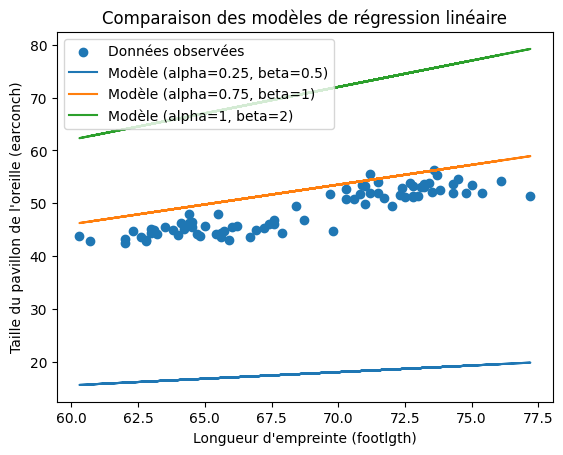

MSE pour chaque modèle :
Model (alpha=0.25, beta=0.5): MSE = 968.020
Model (alpha=0.75, beta=1): MSE = 18.450
Model (alpha=1, beta=2): MSE = 489.516


In [6]:
# Exemples de paramètres
alphas_betas = [(0.25, 0.5), (0.75, 1), (1, 2)]

# Créer le plot
plt.figure()
plt.scatter(footlgth, earconch, label='Données observées')  # Points observés

# Initialisation d'une liste pour stocker les MSE
mse_values = []

# Tracer chaque modèle et calculer les MSE
for alpha, beta in alphas_betas:
    predictions = predict_model(alpha, beta, footlgth)
    error = mean_square_error(earconch, predictions)
    mse_values.append((alpha, beta, error))  # Stocker les résultats
    plt.plot(footlgth, predictions, label=f'Modèle (alpha={alpha}, beta={beta})')

# Ajouter des annotations
plt.xlabel('Longueur d\'empreinte (footlgth)')
plt.ylabel('Taille du pavillon de l\'oreille (earconch)')
plt.title('Comparaison des modèles de régression linéaire')
plt.legend()
plt.show()

# Afficher les MSE pour chaque modèle
print("MSE pour chaque modèle :")
for alpha, beta, error in mse_values:
    print(f"Model (alpha={alpha}, beta={beta}): MSE = {error:.3f}")
